# Netflix Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# loading the data
df = pd.read_csv('datasets/netflix_data.csv')

### Data Inspection

In [4]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [5]:
df.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
df.shape

(8807, 12)

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [9]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Data Cleaning

In [10]:
# Inspect missing values in the dataset
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
round(df.isnull().sum()/df.shape[0]*100,2) #percentage of null values

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

In [14]:
df.dropna(subset=["rating","duration","date_added"],axis=0,inplace=True)
df.shape

(8790, 12)

In [15]:
round(df.isnull().sum()/df.shape[0]*100,2)

show_id          0.00
type             0.00
title            0.00
director        29.82
cast             9.39
country          9.43
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [16]:
#replace missing values in country with "unknown"
df["country"].replace(np.NaN,"Unknown", inplace=True)

In [17]:
round(df.isnull().sum()/df.shape[0]*100,2)

show_id          0.00
type             0.00
title            0.00
director        29.82
cast             9.39
country          0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [18]:
df.country.value_counts().head()

United States     2809
India              972
Unknown            829
United Kingdom     418
Japan              243
Name: country, dtype: int64

In [21]:
df.cast.value_counts().head()

David Attenborough                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil    14
Samuel West                                                                                10
Jeff Dunham                                                                                 7
David Spade, London Hughes, Fortune Feimster                                                6
Name: cast, dtype: int64

In [22]:
#replace missing values in cast with "NA"
df["cast"].replace(np.NaN,"NA", inplace=True)

In [23]:
#replace missing values in Director with "NA"
df["director"].replace(np.NaN,"NA", inplace=True)

In [24]:
round(df.isnull().sum()/df.shape[0]*100,2)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

### Data Visualisation and Analysis

In [49]:
df["director"].value_counts().head(10)

NA                        2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Name: director, dtype: int64

In [62]:
#movies vs tv shows
go.Figure(data=[go.Pie(labels=df.type.value_counts(normalize=True).index, values=df.type.value_counts(normalize=True).values, hole=.5, title="Movies vs Tv shows")])

In [51]:
df.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [52]:
df.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

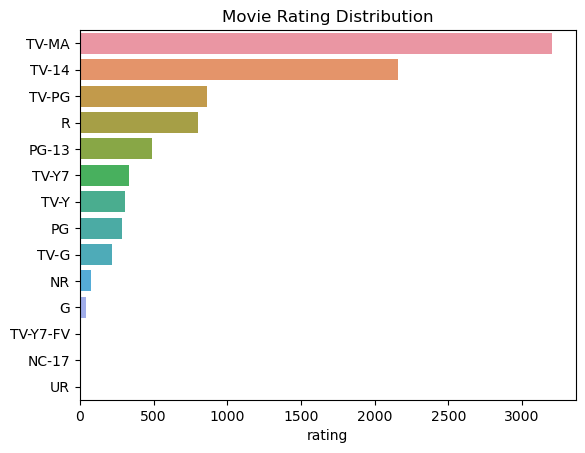

In [66]:
# Movie rating distribution
sns.barplot(x=df.rating.value_counts(), y=df.rating.value_counts().index, data=df)
plt.title("Movie Rating Distribution")
plt.show()

In [56]:
df.country.value_counts().head()

United States     2809
India              972
Unknown            829
United Kingdom     418
Japan              243
Name: country, dtype: int64

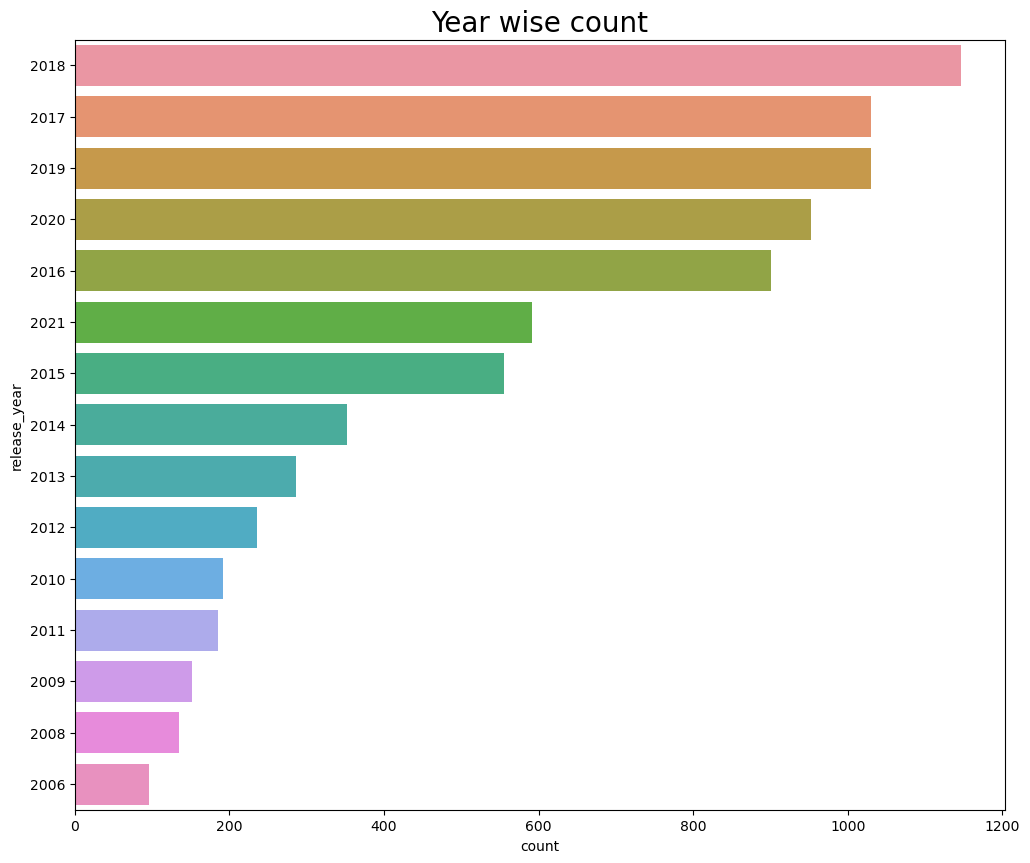

In [73]:
#Year wise count
plt.figure(figsize=(12,10))
ax =sns.countplot(y= "release_year", data=df, order=df.release_year.value_counts().index[0:15])
plt.title("Year wise count",fontsize=20)
plt.show()

In [58]:
df.listed_in.value_counts().head(10)

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

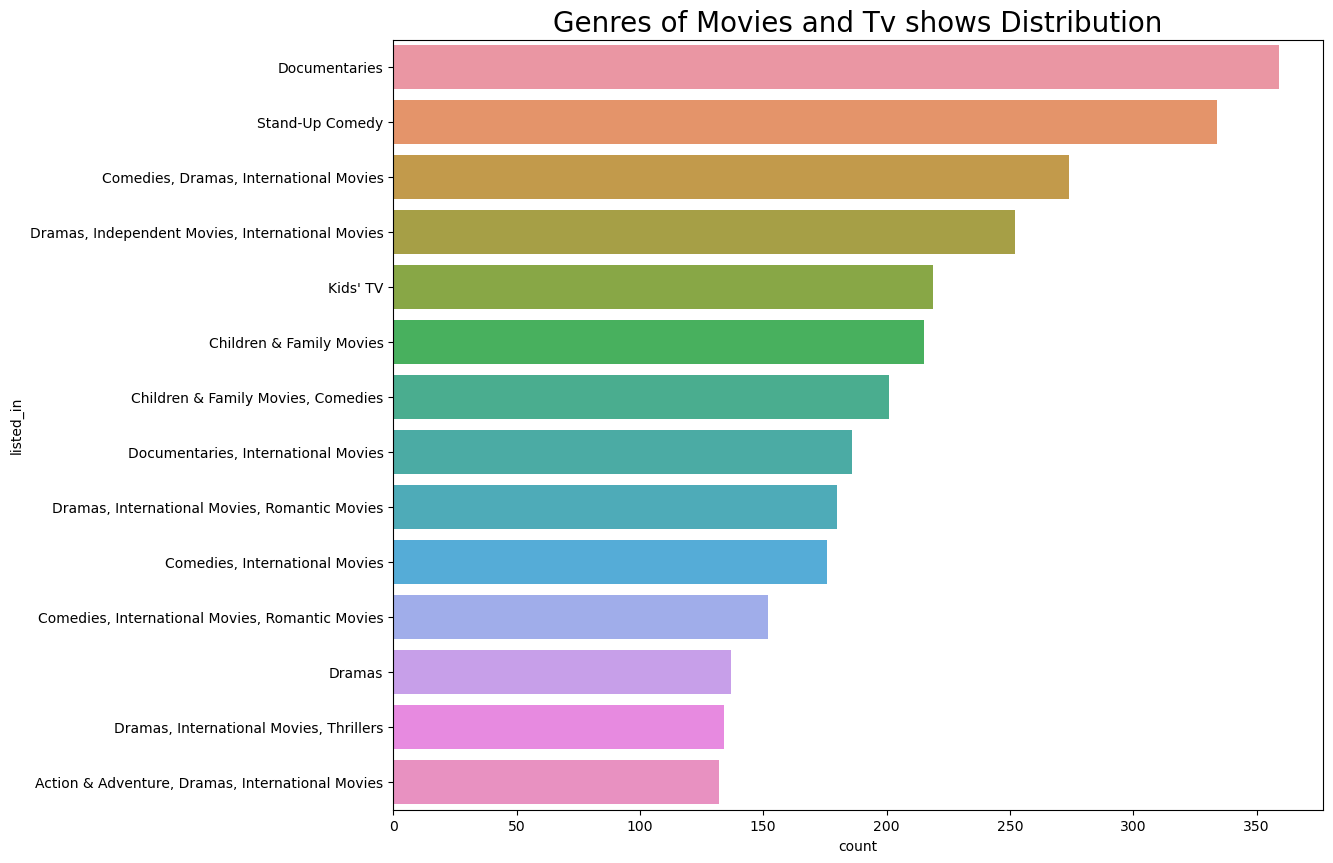

In [74]:
# Genres of Movies and Tv shows Distribution
plt.figure(figsize=(12,10))
ax = sns.countplot(y= "listed_in", data=df,order=df.listed_in.value_counts().index[1:15])
plt.title("Genres of Movies and Tv shows Distribution",fontsize=20)
plt.show()

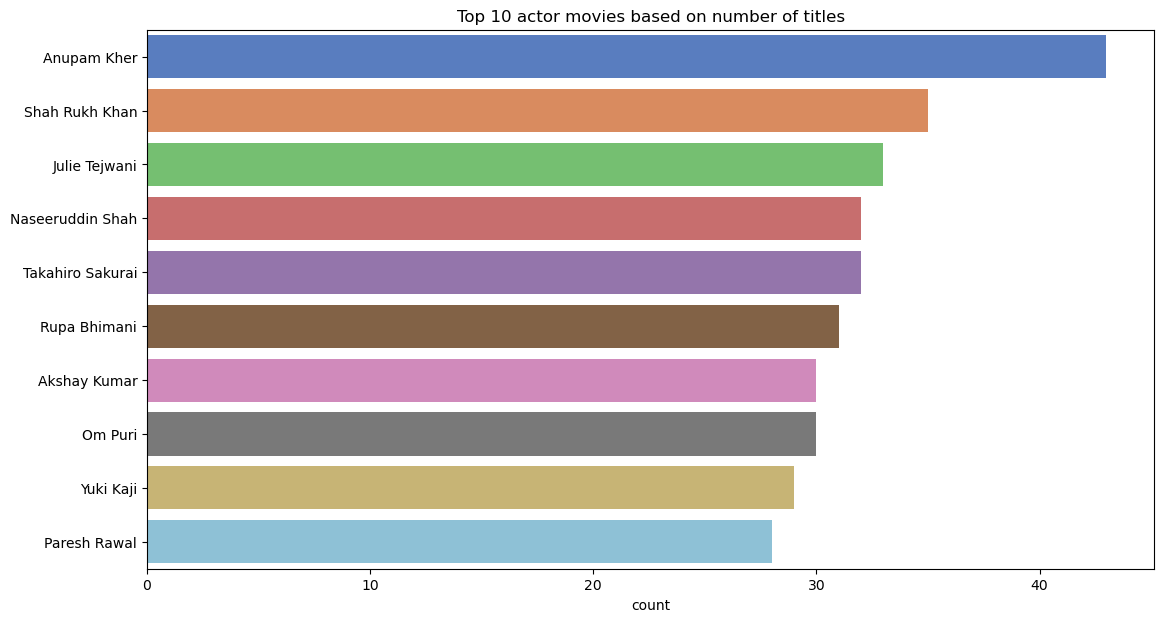

In [60]:
#Top 10 actor movies based on number of titles
cast_shows = df[df.cast != 'NA'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title("Top 10 actor movies based on number of titles")
sns.countplot(y= cast_shows,order=cast_shows.value_counts().index[:10],palette='muted')
plt.show()

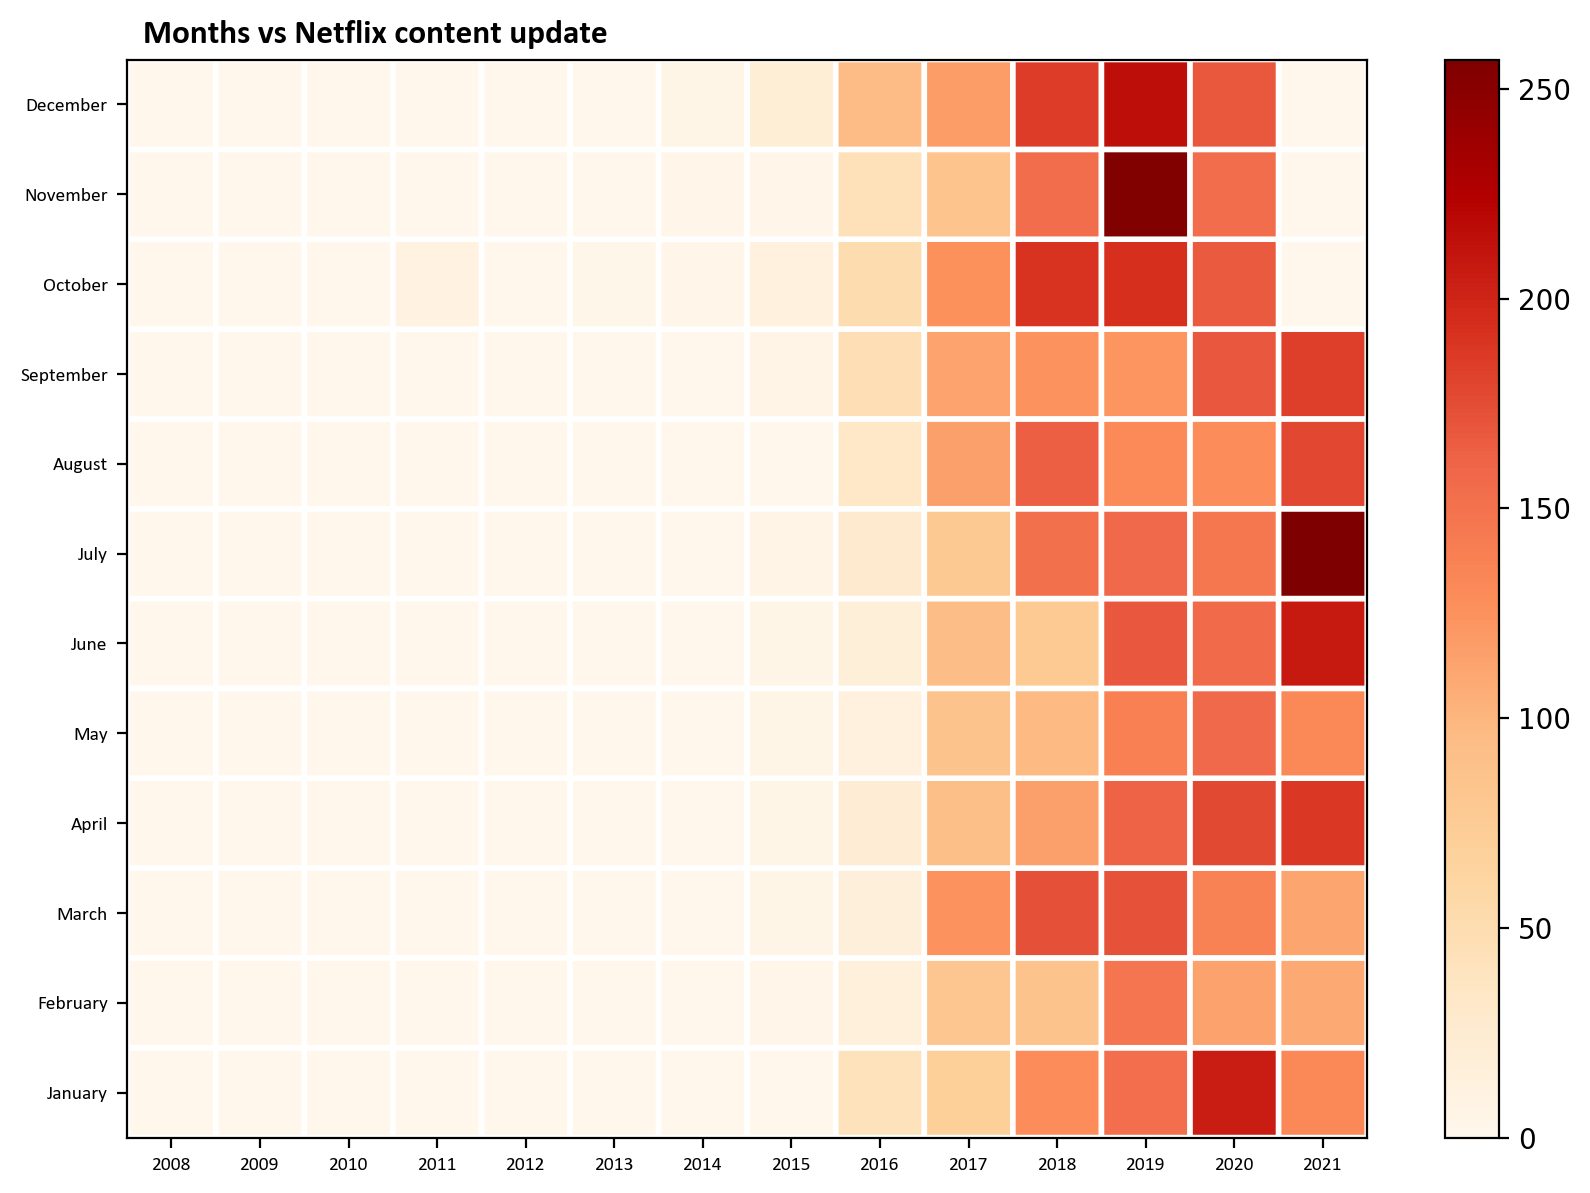

In [75]:
#Heatmap for months vs content Update
netflix_date = df[['date_added']].dropna()
netflix_date['year']=netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
new_df= netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10,7),dpi=200)
plt.pcolor(new_df, cmap= 'OrRd', edgecolors='white',linewidths=2)
plt.xticks(np.arange(0.5, len(new_df.columns),1),new_df.columns,fontsize=7,fontfamily= 'calibri')
plt.yticks(np.arange(0.5, len(new_df.index),1),new_df.index,fontsize=7,fontfamily= 'calibri')

plt.title("Months vs Netflix content update", fontsize=12, fontfamily= 'calibri', fontweight='bold',position=(0.20,1.0+0.02))
char = plt.colorbar()
plt.show()
